**📌 Project Title:
🗳️ "Election Candidate Data Analysis and Winner Prediction using Machine Learning"**

**📘 📌 Introduction:**
*This project focuses on analyzing candidate-level data from Lok Sabha Elections in India using Python, pandas, Seaborn, Plotly, and Scikit-learn. The dataset contains crucial details such as:*

* Candidate Name, Party, Gender, Education

* Assets, Liabilities, Criminal Cases

* Vote counts (General, Postal)

* Election Outcome (WINNER)

**We aim to:**

    *  Clean and preprocess the dataset

    *  Engineer new insightful features

    *  Visualize political and financial patterns

    *  Explore correlation between variables

    *  Predict whether a candidate is likely to win using Machine Learning

This analysis can help understand how wealth, criminal background, and liabilities influence election outcomes.

| 🔢 Step | 📋 Operation                                 |
| ------- | -------------------------------------------- |
| 1️⃣     | Data Upload and Inspection                   |
| 2️⃣     | Data Cleaning and Column Formatting          |
| 3️⃣     | Feature Engineering (Net Worth, Ratio, etc.) |
| 4️⃣     | Summary Statistics and Aggregation           |
| 5️⃣     | Visualization using Plotly and Seaborn       |
| 6️⃣     | Correlation and Distribution Analysis        |
| 7️⃣     | Machine Learning Model to Predict WINNER     |
| 8️⃣     | Feature Importance Analysis                  |


**STEP 1:
Data Upload and Imports.**

*We begin by importing required Python libraries and uploading the dataset into Google Colab.*

*Import Required Libraries*

In [1]:
# Import essential libraries for data manipulation, visualization, and modeling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Import essential libraries for data manipulation, visualization, and modeling
from google.colab import files
uploaded = files.upload()

Saving LS_2.0.csv to LS_2.0.csv


*Load Dataset and Initial Processing*

In [3]:
# Load the uploaded CSV file
data = pd.read_csv('LS_2.0.csv')

In [4]:
# Display initial few rows
data.head(20)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690
6,Uttar Pradesh,AGRA,Preeta Harit,0,INC,Hand,FEMALE,0,54.0,SC,Post Graduate,"Rs 5,50,75,753\n ~ 5 Crore+",Rs 0\n ~,44877,272,45149,2.330042,3.940979,1937690
7,Maharashtra,AHMADNAGAR,Dr. SUJAY RADHAKRISHNA VIKHEPATIL,1,BJP,Lotus,MALE,0,37.0,GENERAL,Doctorate,"Rs 16,86,64,576\n ~ 16 Crore+","Rs 26,23,964\n ~ 26 Lacs+",696961,7699,704660,37.856533,58.425159,1861396
8,Maharashtra,AHMADNAGAR,SANGRAM ARUNKAKA JAGTAP,0,NCP,Clock,MALE,1,34.0,GENERAL,Graduate,"Rs 9,44,88,381\n ~ 9 Crore+","Rs 3,25,49,132\n ~ 3 Crore+",419364,3822,423186,22.734872,35.087431,1861396
9,Maharashtra,AHMADNAGAR,SUDHAKAR LAXMAN AVHAD,0,VBA,Cup & Saucer,MALE,0,62.0,GENERAL,Graduate,"Rs 1,39,49,000\n ~ 1 Crore+","Rs 14,00,000\n ~ 14 Lacs+",31644,163,31807,1.708771,2.637200,1861396


*Clean Column Names*

In [5]:
# Rename column with newline for easier processing
data.rename(columns={'CRIMINAL\nCASES': 'CRIMINAL_CASES'}, inplace=True)

In [6]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL_CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [7]:
# Basic statistics summary
data.describe()

,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


**Step 2: Initial Data Inspection & Cleaning**

 *We inspect the data types, remove duplicate rows, and clean the column names for better usability. Missing values are handled appropriately.*

In [8]:
# Remove any duplicate rows
data = data.drop_duplicates()

In [9]:
# Remove any duplicate rows
data.columns = data.columns.str.strip().str.replace('\n', '_').str.replace(' ', '_')

In [10]:
# Immediately clean ASSETS and LIABILITIES after loading

# Remove "Rs", commas, "\n" and any text after it, then convert to numeric
data['ASSETS'] = data['ASSETS'].astype(str).str.replace('Rs', '', regex=False).str.replace(',', '', regex=False).str.split('\n').str[0].str.strip()
data['LIABILITIES'] = data['LIABILITIES'].astype(str).str.replace('Rs', '', regex=False).str.replace(',', '', regex=False).str.split('\n').str[0].str.strip()

# Convert to numeric and handle errors, filling with 0
data['ASSETS'] = pd.to_numeric(data['ASSETS'], errors='coerce').fillna(0)
data['LIABILITIES'] = pd.to_numeric(data['LIABILITIES'], errors='coerce').fillna(0)

In [11]:
# Show cleaned data
data.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,OVER_TOTAL_ELECTORS__IN_CONSTITUENCY,OVER_TOTAL_VOTES_POLLED__IN_CONSTITUENCY,TOTAL_ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888.0,847000.0,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000.0,15300000.0,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036.0,8606522.0,644459,2416,646875,33.383823,56.464615,1937690


In [12]:
# Check for null values
data.isnull().sum()

,0
STATE,0
CONSTITUENCY,0
NAME,0
WINNER,0
PARTY,0
SYMBOL,245
GENDER,245
CRIMINAL_CASES,245
AGE,245
CATEGORY,245


In [13]:
# Fill numeric columns with 0 where null
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(0)

In [14]:
# Drop rows with any remaining nulls
data = data.dropna()

**Step 3: Feature Engineering**

*We create new columns to add more meaning to the dataset, such as:*

    * NET_WORTH: Assets - Liabilities

    * HAS_CRIMINAL_RECORD: Binary flag if candidate has any criminal case

    * HIGH_VALUE_CANDIDATE: Binary flag if assets > ₹10 crore

    * ASSET_LIABILITY_RATIO: Financial health indicator

In [15]:
# Compute NET_WORTH as ASSETS - LIABILITIES
data['NET_WORTH'] = data['ASSETS'] - data['LIABILITIES']

In [16]:
# Mark candidates with criminal records
data['CRIMINAL_CASES'] = pd.to_numeric(data['CRIMINAL_CASES'], errors='coerce').fillna(0)
data['HAS_CRIMINAL_RECORD'] = 0
data.loc[data['CRIMINAL_CASES'] > 0, 'HAS_CRIMINAL_RECORD'] = 1

In [17]:
# Mark high value candidates based on assets
data['HIGH_VALUE_CANDIDATE'] = 0
data.loc[data['ASSETS'] > 100000000, 'HIGH_VALUE_CANDIDATE'] = 1

In [18]:
# Mark candidates who have liabilities
data['LIABLE'] = 0
data.loc[data['LIABILITIES'] > 0, 'LIABLE'] = 1

In [19]:
# Asset to liability ratio
data['ASSET_LIABILITY_RATIO'] = 0
data.loc[data['LIABILITIES'] > 0, 'ASSET_LIABILITY_RATIO'] = data['ASSETS'] / data['LIABILITIES']

/tmp/ipython-input-1336935535.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 13.3912897   21.81568831   2.38503268 ...   4.79411765 111.64729571
  11.1575861 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['LIABILITIES'] > 0, 'ASSET_LIABILITY_RATIO'] = data['ASSETS'] / data['LIABILITIES']


In [20]:
# Preview new features
display(data.head())

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL_CASES,AGE,CATEGORY,...,POSTAL_VOTES,TOTAL_VOTES,OVER_TOTAL_ELECTORS__IN_CONSTITUENCY,OVER_TOTAL_VOTES_POLLED__IN_CONSTITUENCY,TOTAL_ELECTORS,NET_WORTH,HAS_CRIMINAL_RECORD,HIGH_VALUE_CANDIDATE,LIABLE,ASSET_LIABILITY_RATIO
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.0,52.0,ST,...,482,377374,25.330684,35.468248,1489790,2867964.0,1,0,1,13.391290
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.0,54.0,ST,...,149,318814,21.399929,29.964370,1489790,17630888.0,0,0,1,21.815688
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.0,52.0,ST,...,181,314238,21.092771,29.534285,1489790,21191000.0,1,0,1,2.385033
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.0,58.0,SC,...,2416,646875,33.383823,56.464615,1937690,65667514.0,1,0,1,8.629971
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0.0,47.0,SC,...,1130,435329,22.466390,37.999125,1937690,111532494.0,0,1,1,6.012270


In [21]:
print(data[['ASSETS', 'LIABILITIES']].describe())

             ASSETS   LIABILITIES
count  2.018000e+03  2.018000e+03
mean   1.315849e+08  1.973860e+07
std    4.122697e+08  8.945292e+07
min    0.000000e+00  0.000000e+00
25%    6.272526e+06  0.000000e+00
50%    2.404181e+07  9.039245e+05
75%    9.152498e+07  6.097971e+06
max    8.950179e+09  1.547511e+09


**Step 4: Aggregated Stats by Party and Constituency**

*We analyze the number of candidates per party and identify top constituencies. We also calculate total assets and liabilities per party.*

In [22]:
# Count of candidates per party
candidate_no = data['PARTY'].value_counts()
candidate_no

,count
PARTY,
BJP,420
INC,413
IND,201
BSP,163
CPI(M),100
...,...
TMC(M),1
JKNPP,1
DSSP,1


In [23]:
# Top 20 constituencies by number of candidates
constituency = data['CONSTITUENCY'].value_counts().head(20);

fig = px.bar(
    x=constituency.index[:20],
    y=constituency.values[:20],
    color=constituency.values[:20],
    color_continuous_scale='rainbow',
    title='Top 20 Constituency Names'
)
fig.show()

In [24]:
# Total candidates per party
total_candidates_by_party = data.groupby('PARTY')['NAME'].nunique().reset_index(name='total_candidates').sort_values(by = 'total_candidates',ascending = False)
total_candidates_by_party.index = pd.RangeIndex(len(total_candidates_by_party.index))
total_candidates_by_party.style.background_gradient(cmap='rainbow')

,PARTY,total_candidates
0,BJP,420
1,INC,412
2,IND,201
3,BSP,163
4,CPI(M),100
5,AITC,47
6,VBA,47
7,SP,39
8,NTK,38
9,MNM,36


**Step 5: Criminal Records & Liabilities Analysis**

*Identify candidates with criminal records or high liabilities. We also observe which parties have the most such candidates.*

In [25]:
# Total unique constituencies
print('Total number of UNique Constituencies are = ',data['CONSTITUENCY'].nunique())

Total number of UNique Constituencies are =  539


In [26]:
# Candidates with criminal cases
criminal = data[data['CRIMINAL_CASES']!=0]
criminal = criminal.groupby(['NAME','PARTY'])['CRIMINAL_CASES'].max().reset_index().sort_values(by='CRIMINAL_CASES',ascending=False)
criminal.head(20).style.background_gradient(cmap='rainbow')

,NAME,PARTY,CRIMINAL_CASES
318,K SURENDRAN,BJP,240.000000
64,Adv. DEAN KURIAKOSE,INC,204.000000
650,SOYAM BAPU RAO,BJP,52.000000
33,ANUMULA REVANTH REDDY,INC,42.000000
269,George Tirkey,INC,41.000000
645,SOBHASURENDRAN,BJP,40.000000
587,Rajesh Ranjan @ Pappu Yadav,JAPL,31.000000
751,YOGESH VERMA,BSP,28.000000
40,ARJUN SINGH,BJP,24.000000
70,Adv.PRAKASH BABU,BJP,22.000000


In [27]:
# Total criminal cases by party
total_criminal_by_party = data.groupby('PARTY')['CRIMINAL_CASES'].nunique().reset_index(name='total_candidates').sort_values(by = 'total_candidates',ascending = False)
total_criminal_by_party.index = pd.RangeIndex(len(total_criminal_by_party.index))
total_criminal_by_party.head(20).style.background_gradient(cmap='rainbow')

,PARTY,total_candidates
0,BJP,19
1,INC,15
2,CPI(M),12
3,BSP,10
4,IND,9
5,SP,9
6,RJD,8
7,SHS,8
8,NCP,7
9,YSRCP,6


In [28]:
# Sum of liabilities per party
Total_Liabilities = data.groupby('PARTY')['LIABILITIES'].sum().reset_index()

In [29]:
# Total assets per party
total_assets=data.groupby('PARTY')['ASSETS'].sum().reset_index(name='ASSETS')
total_assets.head(20).style.background_gradient(cmap='rainbow')

,PARTY,ASSETS
0,AAM,3147621.000000
1,AAP,1183800591.000000
2,ABGP,6264000.000000
3,ABSKP,1726000.000000
4,ADAL,49948740.000000
5,AGP,38585442.000000
6,AHFBK,6006600.000000
7,AHNP,1665000.000000
8,AIADMK,1880969470.000000
9,AIFB,34445292.000000


In [30]:
# Top liability holders
Liabilities_holder = data[data['LIABILITIES']!=0]
Liabilities_holder =Liabilities_holder.groupby(['NAME','PARTY'])['LIABILITIES'].max().reset_index().sort_values(by='LIABILITIES',ascending=False)
Liabilities_holder.head(20).style.background_gradient(cmap='prism_r')

,NAME,PARTY,LIABILITIES
1339,Vasanthakumar. H,INC,1547511439.000000
712,MALA RAJYA LAXMI SHAH,BJP,1350000000.000000
820,NAVAJYOTI PATNAIK,INC,1079582000.000000
717,MALOOK NAGAR,BSP,1016148176.000000
605,KANUMURU RAGHU RAMA KRISHNA RAJU,YSRCP,1014467354.000000
514,Harsimrat Kaur Badal,SAD,954852600.000000
1178,SUKHBIR SINGH BADAL,SAD,954852600.000000
1073,Ranjeetsinha Hindurao Naik- Nimbalkar,BJP,896315287.000000
175,BALASHOWRY VALLABHANENI,YSRCP,746310844.000000
1298,UDAY SINGH ALIAS PAPPU SINGH,INC,715792024.000000


In [31]:
# Compare assets and liabilities of top 50
assets_liabilities = data.groupby(['NAME','PARTY'])[['LIABILITIES','ASSETS']].sum().reset_index().sort_values(by=['LIABILITIES','ASSETS'], ascending=[False,False]).head(50)
assets_liabilities.style.background_gradient(cmap='RdPu_r')

,NAME,PARTY,LIABILITIES,ASSETS
1981,Vasanthakumar. H,INC,1547511439.000000,4174930444.000000
1023,MALA RAJYA LAXMI SHAH,BJP,1350000000.000000,1846640100.000000
1185,NAVAJYOTI PATNAIK,INC,1079582000.000000,1042005000.000000
1028,MALOOK NAGAR,BSP,1016148176.000000,2499628021.000000
872,KANUMURU RAGHU RAMA KRISHNA RAJU,YSRCP,1014467354.000000,3259405378.000000
745,Harsimrat Kaur Badal,SAD,954852600.000000,2179919870.000000
1731,SUKHBIR SINGH BADAL,SAD,954852600.000000,2179919870.000000
1575,Ranjeetsinha Hindurao Naik- Nimbalkar,BJP,896315287.000000,1275160578.000000
246,BALASHOWRY VALLABHANENI,YSRCP,746310844.000000,990575840.000000
1915,UDAY SINGH ALIAS PAPPU SINGH,INC,715792024.000000,3418643970.000000


**Step 6: Visual Explorations**

*Visualize trends using:*

    * Strip plots and box plots (Assets & Liabilities by Party)

    * Count plots (Candidates by Party)

    * Correlation heatmaps (relation between numerical features)

    * Histograms for asset distribution

*Pair plots for multi-variable relationships*

In [32]:
# Filter top 10 parties
top10_parties = data['PARTY'].value_counts().nlargest(10).index
top10_data = data[data['PARTY'].isin(top10_parties)]

<Axes: xlabel='count', ylabel='PARTY'>

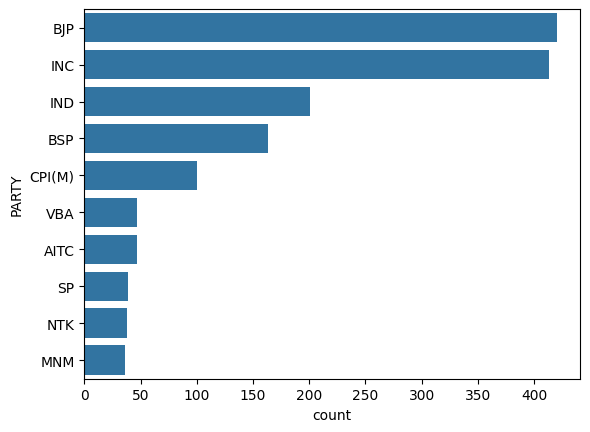

In [33]:
# Countplot of candidates by party
sns.countplot(y='PARTY', data=top10_data, order=top10_data['PARTY'].value_counts().index)

<Axes: xlabel='ASSETS', ylabel='PARTY'>

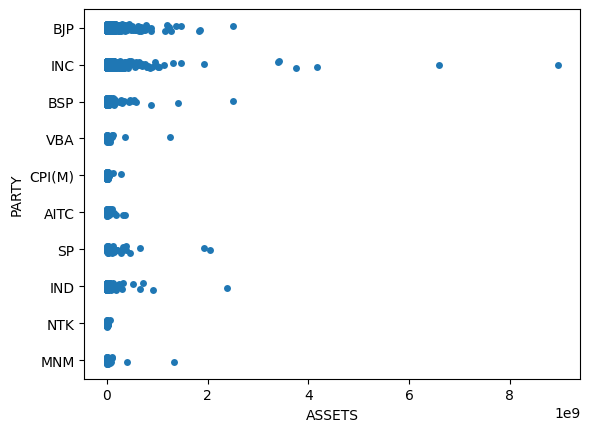

In [34]:
# Stripplot for assets vs party
sns.stripplot(x='ASSETS', y='PARTY', data=top10_data, jitter=True)

<Axes: xlabel='PARTY', ylabel='LIABILITIES'>

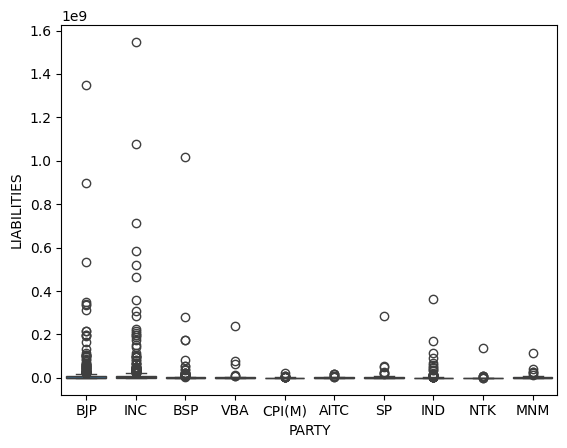

In [35]:
# Boxplot for liabilities vs party
sns.boxplot(x='PARTY', y='LIABILITIES', data=top10_data)

<Axes: xlabel='PARTY', ylabel='ASSETS'>

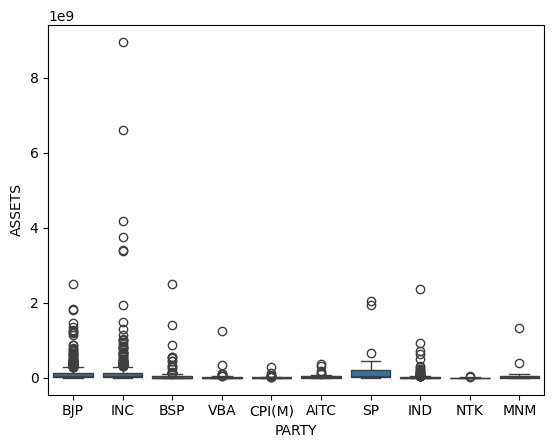

In [36]:
# Boxplot for assets vs party
sns.boxplot(x='PARTY', y='ASSETS', data=top10_data)

*Correlation Analysis*

In [37]:
# Get correlation of all numeric columns with ASSETS
corr = data.select_dtypes(include=np.number).corr()

In [38]:
# Get correlation of all numeric columns with ASSETS
corr = data.select_dtypes(include=np.number).corr()

# Pick top 5 features most correlated with ASSETS (excluding ASSETS itself)
top_corr_features = corr['ASSETS'].abs().sort_values(ascending=False).head(6).index

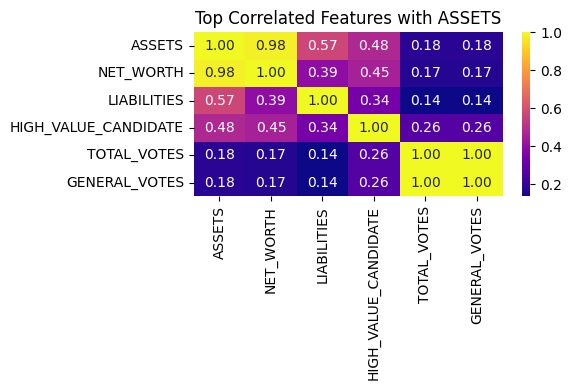

In [39]:
# Plot heatmap using only those columns
plt.figure(figsize=(6, 4))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='plasma', fmt=".2f")
plt.title("Top Correlated Features with ASSETS")
plt.tight_layout()
plt.show()

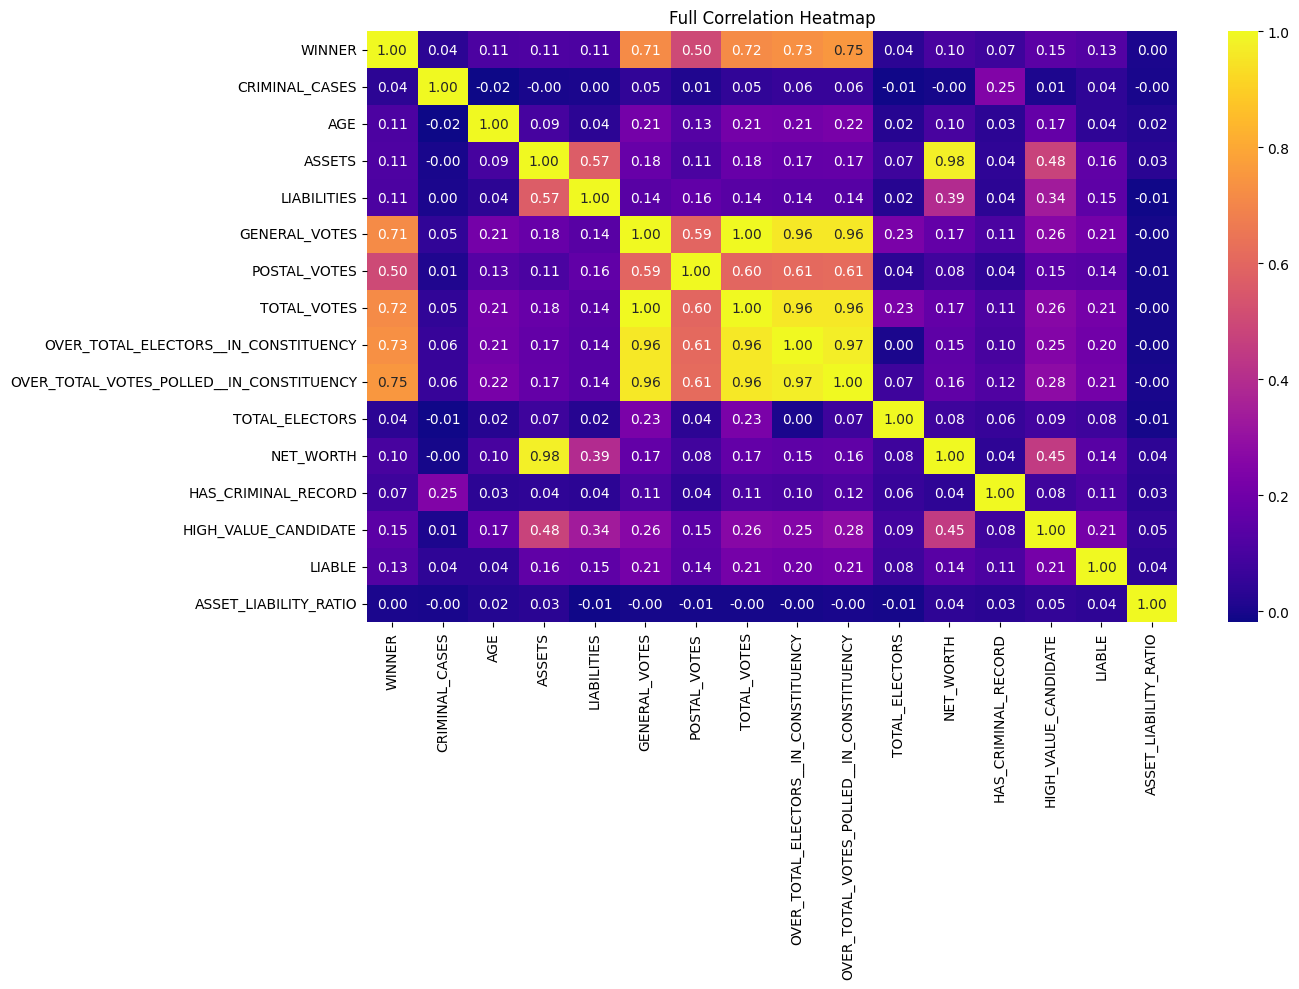

In [40]:
plt.figure(figsize=(14, 10))  # Wider and taller
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap='plasma', fmt=".2f")
plt.title("Full Correlation Heatmap")
plt.tight_layout()
plt.show()


*Distribution Plots*

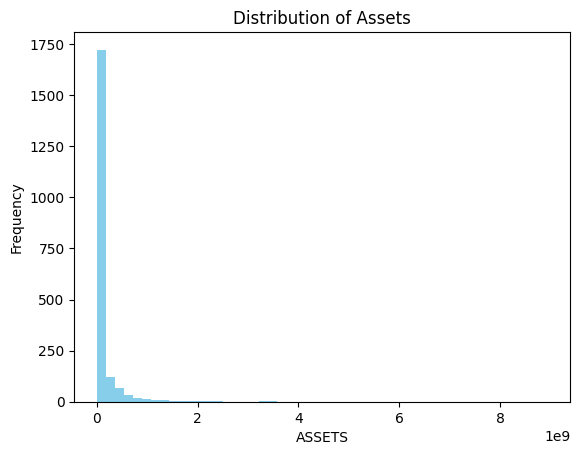

In [41]:
# Histogram for assets
plt.hist(data['ASSETS'], bins=50, color='skyblue')
plt.title("Distribution of Assets")
plt.xlabel("ASSETS")
plt.ylabel("Frequency")
plt.show()

<Axes: xlabel='PARTY'>

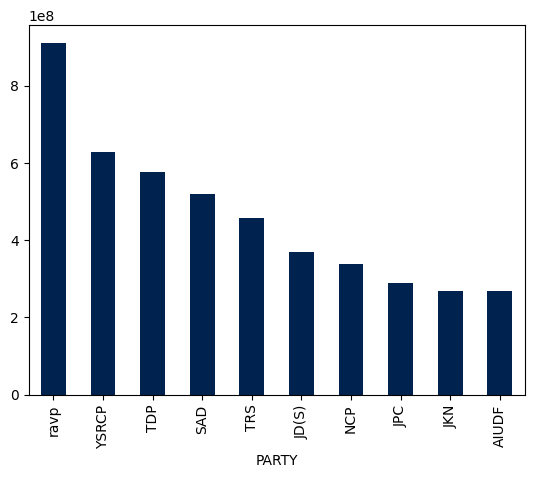

In [42]:
# Mean assets by party
data.groupby('PARTY')['ASSETS'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='cividis')

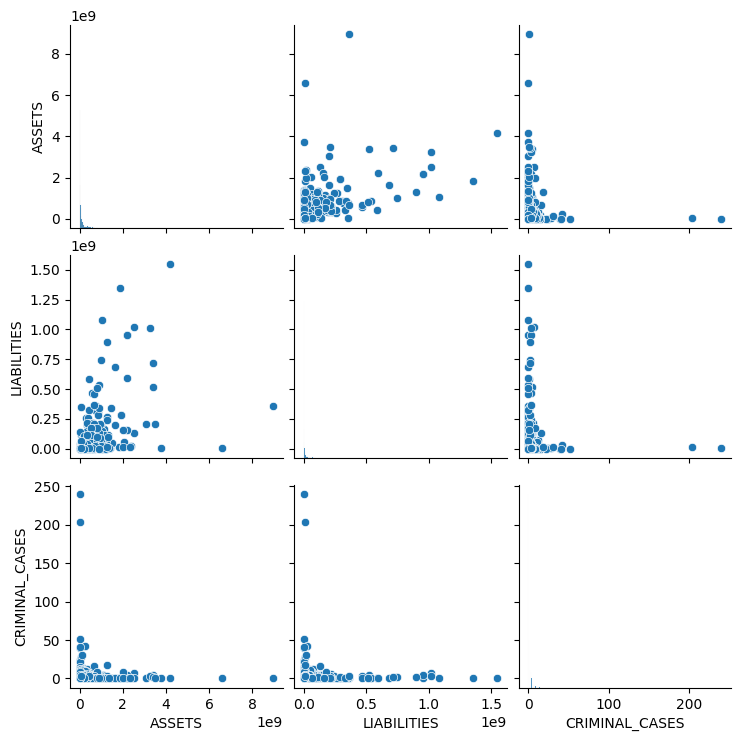

In [43]:
# Pairplot
sns.pairplot(data[['ASSETS','LIABILITIES','CRIMINAL_CASES']])

**Step 7: Machine Learning - Winner Prediction**

*We use a Random Forest Classifier to predict the WINNER column using features like:*

    * ASSETS

    * LIABILITIES

    * CRIMINAL_CASES

    * AGE

*The data is split into training and test sets, and model performance is evaluated using accuracy and a classification report.*

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
features = ['ASSETS', 'LIABILITIES', 'CRIMINAL_CASES', 'AGE']

In [45]:
X = data[features]
y = data['WINNER']

In [46]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# Prediction and evaluation
y_pred = model.predict(X_test)

In [49]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6757425742574258
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80       291
           1       0.32      0.14      0.20       113

    accuracy                           0.68       404
   macro avg       0.52      0.51      0.50       404
weighted avg       0.61      0.68      0.63       404



**Step 8: Feature Importance Analysis**

*We identify which features contribute most to predicting election winners, helping understand voter decision factors.*

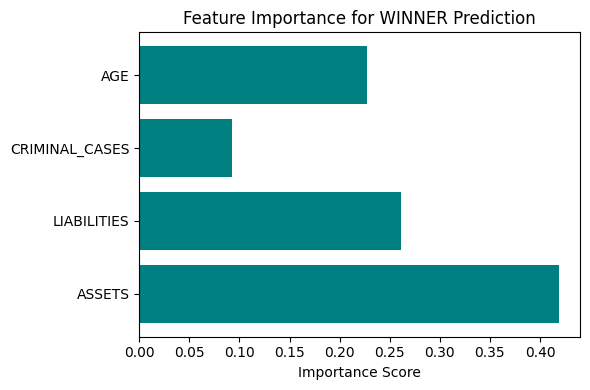

In [50]:
import matplotlib.pyplot as plt

# Plot feature importance
importances = model.feature_importances_
plt.figure(figsize=(6,4))
plt.barh(features, importances, color='teal')
plt.xlabel("Importance Score")
plt.title("Feature Importance for WINNER Prediction")
plt.tight_layout()
plt.show()